# Electron degeneracy derivatives

Compute the various thermodynamic derivatives of the electron-positron number density, pressure, and energy.
In general, each quantity is a function of various Fermi-Dirac integrals of the form:

$$F_k(\eta, \beta) = \int_0^\infty
           \frac{x^k [1 + (x\beta/2)]^{1/2}}{e^{x-\eta} + 1} dx$$

where $\beta = kT / (m_e c^2)$ and $\eta = (\mu - m_e c^2)/(kT)$

The expressions we use for $n_e$, $p_e$, $e_e$, and their positron equivalents come from Timmes & Arnett (1999), but note that their expression for $n_e$ is missing a $\beta$ factor.

In general, we compute the derivatives with respect to $\rho$ and $T$ via the chain rule, which means that we need $d\eta/d\rho |_T$, $d\eta/dT|_\rho$, and $d\beta/dT|_\rho = k / (m_e c^2)$ (note that $d\beta /d\rho|_T = 0)$.

In [1]:
from sympy import init_session

In [2]:
init_session()

IPython console for SymPy 1.14.0 (Python 3.13.7-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



## Setup the dependencies

We'll have $\rho$ and $T$ be the independent variables.

In [3]:
# Independent variables
rho, T = symbols('rho T')

We'll express $\eta = \eta(\rho, T)$ and $\beta = \beta(T)$ (since $\beta = kT / (m_e c^2)$).

When simplifying, we'll express $\beta = a T$ to evaluate the derivatives for us.

In [4]:
a = symbols("a", real=-True, positive=True)

In [5]:
eta = Function('eta')(rho, T)
beta = Function('beta')(T)

In [6]:
# for positrons, we will use eta_tilde in the expressions
eta_tilde_expr = -eta - 2 / beta

## Derivatives of $\eta$ with respect to $\rho$ and $T$

Now, we'll write the electron and positron densities as functions of the symbol $\eta$ and $\beta$

In [7]:
# dummy variables for the arguments
eta_sym, beta_sym = symbols('eta beta')
n_e_func = Function('n_e')(eta_sym, beta_sym)
n_p_func = Function('n_p')(eta_sym, beta_sym)

# Now substitute eta(rho, T) and beta(T) into n_e and n_p
n_e_expr = n_e_func.subs({eta_sym: eta, beta_sym: beta})
n_p_expr = n_p_func.subs({eta_sym: eta, beta_sym: beta})

Now we want to construct the expression

$$n_e - n_p = N_A \frac{Z}{A} \rho$$

we'll do this by defining the left and righthand sides separately.

In [8]:
lhs_expr = n_e_expr - n_p_expr

In [9]:
N_A, Z, A = symbols('N_A Z A', constant=True)
rhs_expr = (N_A * Z / A) * rho

### Compute $\partial \eta/\partial T$

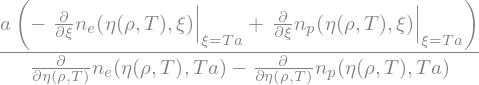

In [10]:
lhs_diff = diff(lhs_expr, T)
rhs_diff = diff(rhs_expr, T)

# Solve for ∂η/∂T
deta_dT = symbols('deta_dT')
lhs_diff_sub = lhs_diff.subs(diff(eta, T), deta_dT)
deta_dT_expr = solve(lhs_diff_sub - rhs_diff, deta_dT)[0]

simplify(deta_dT_expr.subs(beta, a * T))

### Compute $\partial \eta / \partial \rho$

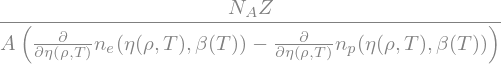

In [11]:
lhs_diff = diff(lhs_expr, rho)
rhs_diff = diff(rhs_expr, rho)

# Solve for ∂η/∂ρ
deta_drho = symbols('deta_drho')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho), deta_drho)
deta_drho_expr = solve(lhs_diff_sub - rhs_diff, deta_drho)[0]

deta_drho_expr

### Compute $\partial^2 \eta/\partial T^2$

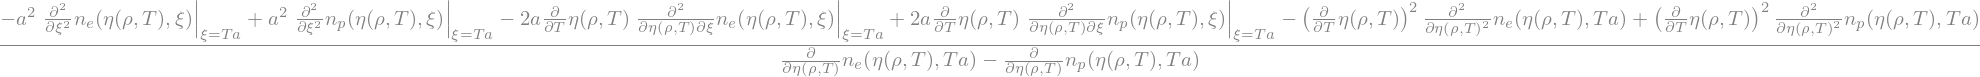

In [12]:
lhs_diff = diff(lhs_expr, T, T)
rhs_diff = diff(rhs_expr, T, T)

# Solve for ∂²η/∂T²
d2eta_dT2 = symbols('d2eta_dT2')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, T), d2eta_dT2)
d2eta_dT2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dT2)[0]

simplify(d2eta_dT2_expr.subs(beta, a * T))

### Compute $\partial^2 \eta /\partial \rho \partial T$

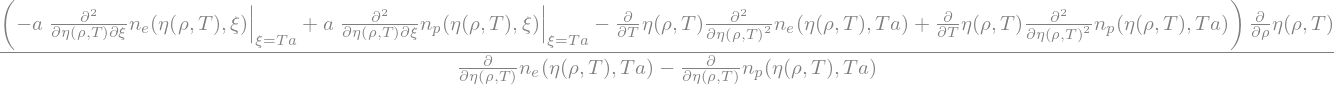

In [13]:
lhs_diff = diff(lhs_expr, T, rho)
rhs_diff = diff(rhs_expr, T, rho)

# Solve for ∂²η/∂T∂ρ
d2eta_dTdrho = symbols('d2eta_dTdrho')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, rho), d2eta_dTdrho)
d2eta_dTdrho_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dTdrho)[0]

simplify(d2eta_dTdrho_expr.subs(beta, a * T))

### Compute $\partial^2 \eta /\partial \rho^2$

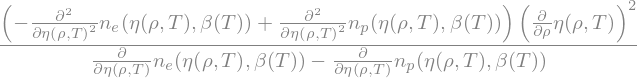

In [14]:
lhs_diff = diff(lhs_expr, rho, rho)
rhs_diff = diff(rhs_expr, rho, rho)

# Solve for ∂²η/∂ρ²
d2eta_drho2 = symbols('d2eta_drho2')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, rho), d2eta_drho2)
d2eta_drho2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_drho2)[0]

simplify(d2eta_drho2_expr)

### Compute $\partial^3 \eta /\partial T^3$

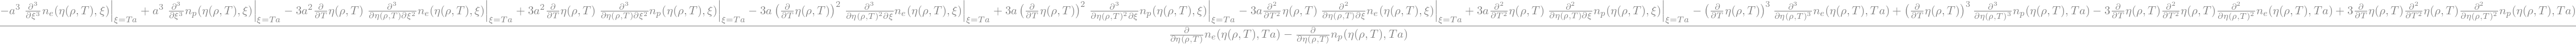

In [15]:
lhs_diff = diff(lhs_expr, T, T, T)
rhs_diff = diff(rhs_expr, T, T, T)

# Solve for ∂³η/∂T³
d3eta_dT3 = symbols('d3eta_dT3')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, T, T), d3eta_dT3)
d3eta_dT3_expr = solve(lhs_diff_sub - rhs_diff, d3eta_dT3)[0]

simplify(d3eta_dT3_expr.subs(beta, a * T))

### Compute $\partial^3 \eta /\partial T^2 \partial \rho$

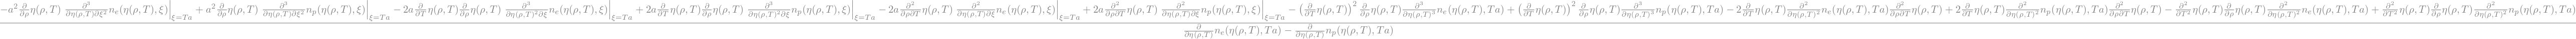

In [16]:
lhs_diff = diff(lhs_expr, rho, T, T)
rhs_diff = diff(rhs_expr, rho, T, T)

# Solve for ∂³η/∂ρ∂T²
d3eta_drhodT2 = symbols('d3eta_drhodT2')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, T, T), d3eta_drhodT2)
d3eta_drhodT2_expr = solve(lhs_diff_sub - rhs_diff, d3eta_drhodT2)[0]

simplify(d3eta_drhodT2_expr.subs(beta, a * T))

### Compute $\partial^3 \eta /\partial T \partial \rho^2$

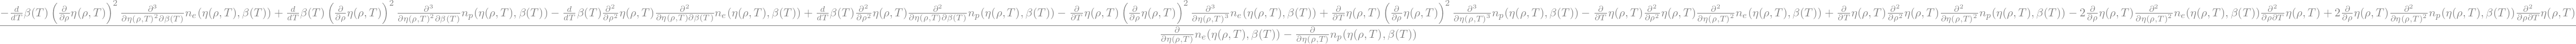

In [17]:
lhs_diff = diff(lhs_expr, rho, rho, T)
rhs_diff = diff(rhs_expr, rho, rho, T)

# Solve for ∂³η/∂ρ²∂T
d3eta_drho2dT = symbols('d3eta_drho2dT')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, rho, T), d3eta_drho2dT)
d3eta_drho2dT_expr = solve(lhs_diff_sub - rhs_diff, d3eta_drho2dT)[0]

simplify(d3eta_drho2dT_expr)

### Compute $\partial^3 \eta /\partial \rho^3$

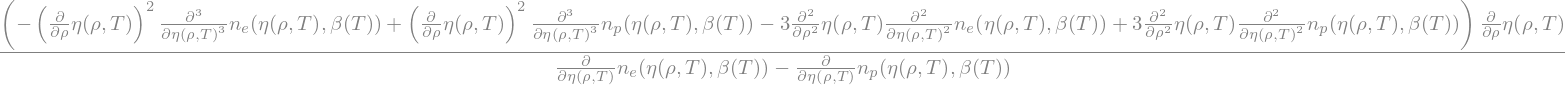

In [18]:
lhs_diff = diff(lhs_expr, rho, rho, rho)
rhs_diff = diff(rhs_expr, rho, rho, rho)

# Solve for ∂³η/∂ρ³
d3eta_drho3 = symbols('d3eta_drho3')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, rho, rho), d3eta_drho3)
d3eta_drho3_expr = solve(lhs_diff_sub - rhs_diff, d3eta_drho3)[0]

simplify(d3eta_drho3_expr)

## Derivatives of the $n_e$ and $n_p$ with respect to $\eta$ and $\beta$

```{note}
We'll do this in a generic fashion below, which will work for any thermodynamic quantity
```

To evaluate the above derivatives of $\eta$ and $\beta$ with respect to $\rho$ and $T$, we need the derivatives of the number density with respect to $\eta$ and $\beta$.

First let's define the Fermi functions we'll need (we'll include the 5/2 one we need later too)

In [19]:
F12_func = Function("F_{1/2}")(eta_sym, beta_sym)
F32_func = Function("F_{3/2}")(eta_sym, beta_sym)
F52_func = Function("F_{5/2}")(eta_sym, beta_sym)

F12_expr = F12_func.subs({eta_sym: eta, beta_sym: beta})
F32_expr = F32_func.subs({eta_sym: eta, beta_sym: beta})
F52_expr = F52_func.subs({eta_sym: eta, beta_sym: beta})

For positrons, we evaluate these with $\tilde{\eta}$

In [20]:
F12_tilde_expr = F12_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F32_tilde_expr = F32_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F52_tilde_expr = F52_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})

### First $n_e$

now write out what the number densities are

In [21]:
C = symbols("C", constant=True)

In [22]:
n_e_full = C * beta**Rational(3,2) * (F12_expr + beta * F32_expr)
n_e_full

and we can compute the derivatives of $n_e$

$\partial n_e / \partial \eta$

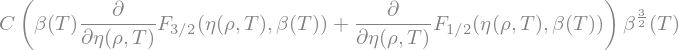

In [23]:
dne_deta = diff(n_e_full, eta)
dne_deta

$\partial n_e / \partial \beta$

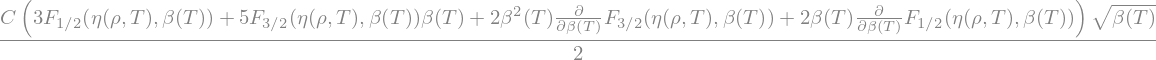

In [24]:
dne_dbeta = diff(n_e_full, beta)
simplify(dne_dbeta)

### Next, $n_p$

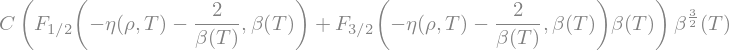

In [25]:
n_p_full = C * beta**Rational(3,2) * (F12_tilde_expr + beta * F32_tilde_expr)
n_p_full

$\partial n_p /\partial \eta$

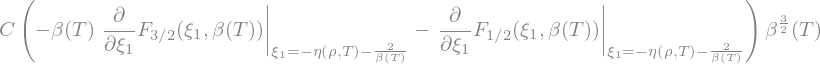

In [26]:
dnp_deta = diff(n_p_full, eta)
dnp_deta

$\partial n_p / \partial \beta$

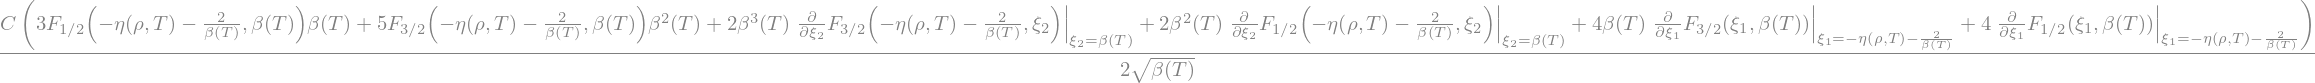

In [27]:
dnp_dbeta = diff(n_p_full, beta)
simplify(dnp_dbeta)

### Second derivatives

$\partial^2 n_e / \partial \eta^2$

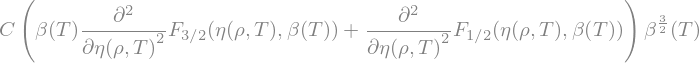

In [28]:
d2ne_deta2 = diff(n_e_full, eta, eta)
d2ne_deta2

$\partial^2 n_e / \partial \eta \partial\beta$

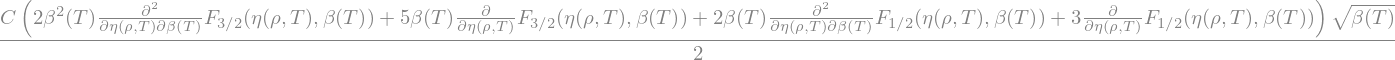

In [29]:
d2ne_detadbeta = diff(n_e_full, eta, beta)
simplify(d2ne_detadbeta)

$\partial^2 n_e / \partial \beta^2$

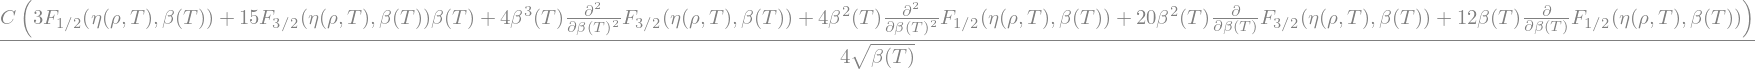

In [30]:
d2ne_dbeta2 = diff(n_e_full, beta, beta)
simplify(d2ne_dbeta2)

$\partial^2 n_p / \partial \eta^2$

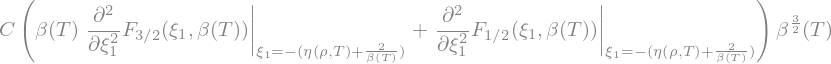

In [31]:
d2np_deta2 = diff(n_p_full, eta, eta)
d2np_deta2

$\partial^2 n_p / \partial \eta \partial\beta$

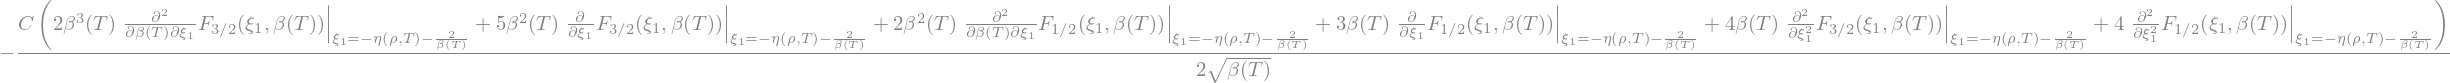

In [32]:
d2np_detadbeta = diff(n_p_full, eta, beta)
simplify(d2np_detadbeta)

$\partial^2 n_p / \partial \beta^2$

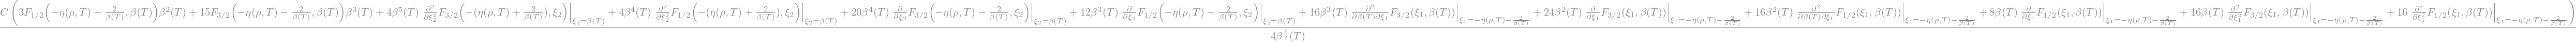

In [33]:
d2np_dbeta2 = diff(n_p_full, beta, beta)
simplify(d2np_dbeta2)

```{note}
At this point, we can compute $\partial \eta/\partial \rho$, $\partial \eta / \partial T$, $\partial^2 \eta/\partial \rho^2$, $\partial^2 \eta /\partial T^2$, and $\partial^2 \eta / \partial \rho \partial T$.  And we also know $\partial \beta /\partial T$.  Therefore we have everything we need to compute the first and second derivatives of all the thermodynamic quantities via the chain rule.
```

## Chain Rule

For any thermodynamic function $f$, we can compute the derivatives of $f$ with respect to $\rho$ and $T$ through their dependencies in $\beta$ and $\eta$.
This is how we'll compute the derivatives of $p$, $e$ and $s$ with respect to $\rho$ and $T$ (including the second derivatives)

In [34]:
f_func = Function('f')(eta_sym, beta_sym)
f_expr = f_func.subs({eta_sym: eta, beta_sym: beta})

### First derivatives

$\partial f/\partial \rho$

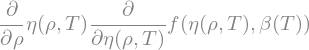

In [35]:
df_drho = diff(f_expr, rho)
df_drho

$\partial f/\partial T$

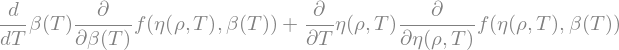

In [36]:
df_dT = diff(f_expr, T)
df_dT

### Second derivatives

$\partial^2 f / \partial \rho^2$

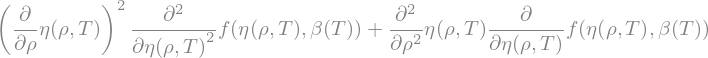

In [37]:
d2f_drho2 = diff(f_expr, rho, rho)
d2f_drho2

$\partial^2 f /\partial T^2$

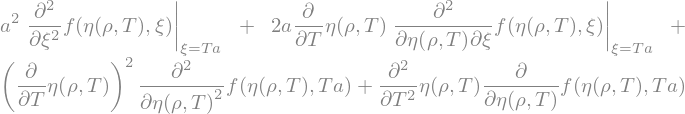

In [38]:
d2f_dT2 = diff(f_expr, T, T)
simplify(d2f_dT2.subs(beta, a * T))

$\partial^2 f /\partial \rho \partial T$

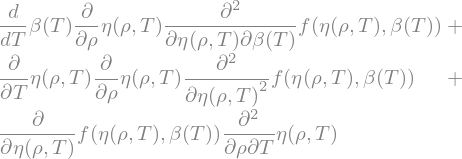

In [39]:
d2f_drhodT = diff(f_expr, rho, T)
simplify(d2f_drhodT)

### Third derivatives

$\partial^3 f / \partial \rho^3$

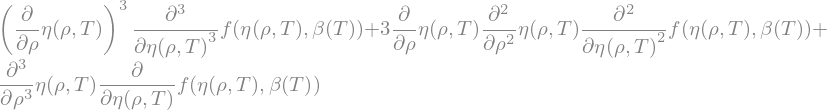

In [40]:
d3f_drho3 = diff(f_expr, rho, rho, rho)
simplify(d3f_drho3)

$\partial^3 f / \partial \rho^2\partial T$

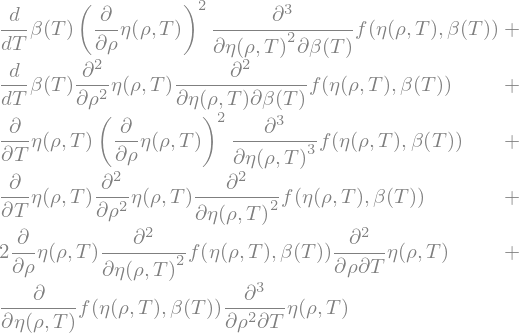

In [41]:
d3f_drho2dT = diff(f_expr, rho, rho, T)
simplify(d3f_drho2dT)

$\partial^3 f / \partial \rho\partial T^2$

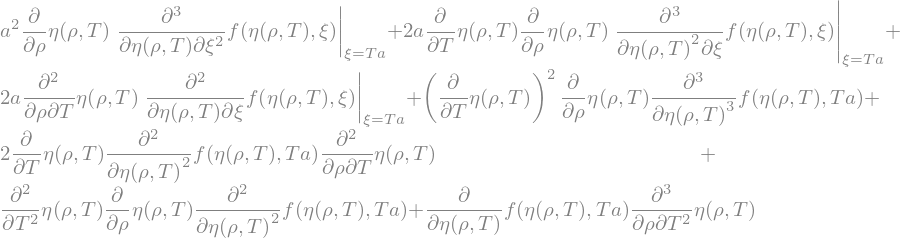

In [42]:
d3f_drhodT2 = diff(f_expr, rho, T, T)
simplify(d3f_drhodT2.subs(beta, a * T))

$\partial^3 f / \partial T^3$

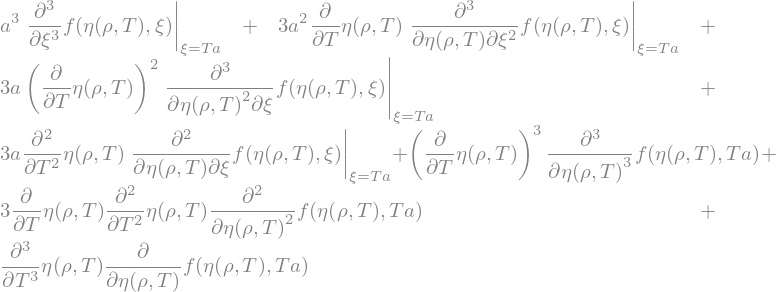

In [43]:
d3f_dT3 = diff(f_expr, T, T, T)
simplify(d3f_dT3.subs(beta, a * T))

## Now thermodynamic derivatives

All of the thermodynamic quantities are functions that look like:

$$q = A \beta^{p/2} (F_x(\eta,\beta) + c \beta F_y(\eta, \beta))$$

for electrons and 

$$w = A \beta^{p/2} (F_x(\tilde{\eta}, \beta) + c \beta F_y(\tilde{\eta}, \beta))$$

for positrons,
where $A$ is a constant, $p$ is an integer ($>0$), and $c$ is a constant, and $F_x$ and $F_y$ are Fermi integrals of different indices.

Therefore we can just compute the $\eta$ and $\beta$ derivatives of these and use them for $n$, $p$ and $(\rho e)$.

In [44]:
Fx_func = Function("F_x")(eta_sym, beta_sym)
Fy_func = Function("F_y")(eta_sym, beta_sym)


Fx_expr = Fx_func.subs({eta_sym: eta, beta_sym: beta})
Fy_expr = Fy_func.subs({eta_sym: eta, beta_sym: beta})

Fx_tilde_expr = Fx_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
Fy_tilde_expr = Fy_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})

In [45]:
p = symbols("p", integer=True, positive=True)
c = symbols("c", real=True, positive=True)

### electrons

In [46]:
q_full = A * beta**(p/2) * (Fx_expr + c * beta * Fy_expr)
q_full

$\partial q / \partial \eta$

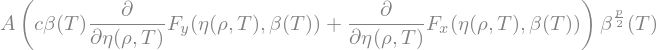

In [47]:
dqdeta = diff(q_full, eta)
dqdeta

$\partial q/\partial \beta$

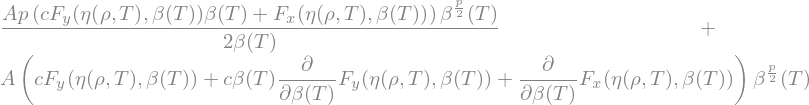

In [48]:
dqdbeta = diff(q_full, beta)
dqdbeta

$\partial^2 q /\partial \eta^2$

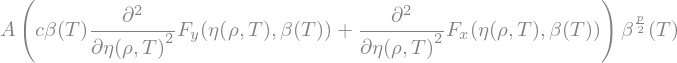

In [49]:
d2qdeta2 = diff(q_full, eta, eta)
d2qdeta2

$\partial^2 q/\partial \beta^2$

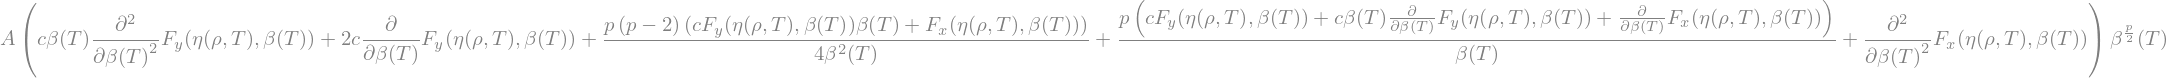

In [50]:
d2qdbeta2 = diff(q_full, beta, beta)
d2qdbeta2

$\partial^2 q / \partial \eta \partial \beta$

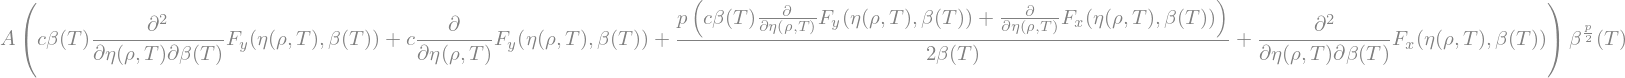

In [51]:
d2qdetadbeta = diff(q_full, eta, beta)
d2qdetadbeta

$\partial^3 q / \partial \eta^3$

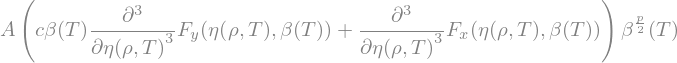

In [52]:
d3qdeta3 = diff(q_full, eta, eta, eta)
d3qdeta3

$\partial^3 q / \partial \eta^2 \partial \beta$

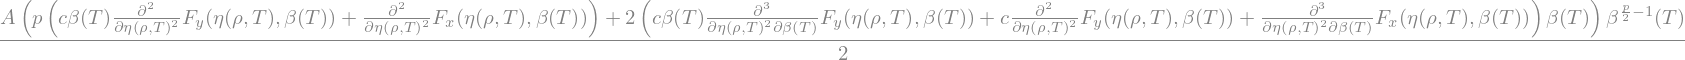

In [53]:
d3qdeta2dbeta = diff(q_full, eta, eta, beta)
simplify(d3qdeta2dbeta)

$\partial^3 q / \partial \eta\partial \beta^2$

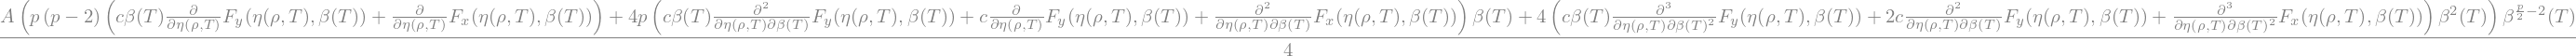

In [54]:
d3qdetadbeta2 = diff(q_full, eta, beta, beta)
simplify(d3qdetadbeta2)

$\partial^3 q / \partial \beta^3$

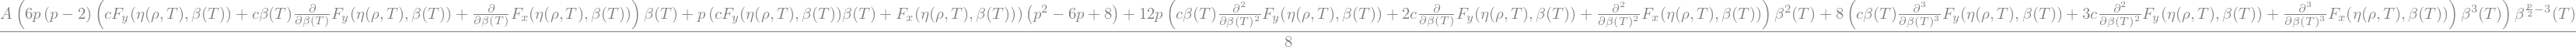

In [55]:
d3qdbeta3 = diff(q_full, beta, beta, beta)
simplify(d3qdbeta3)

### positrons

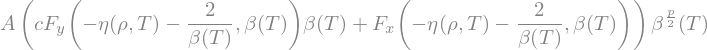

In [56]:
w_full = A * beta**(p/2) * (Fx_tilde_expr + c * beta * Fy_tilde_expr)
w_full

$\partial w / \partial \eta$

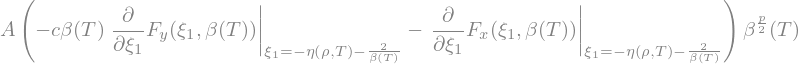

In [57]:
dwdeta = diff(w_full, eta)
dwdeta

$\partial w/\partial \beta$

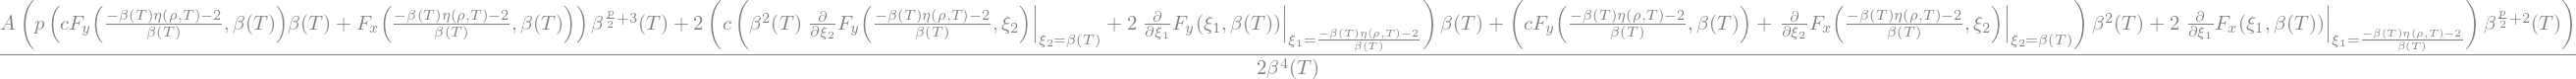

In [58]:
dwdbeta = diff(w_full, beta)
simplify(dwdbeta)

$\partial^2 w /\partial \eta^2$

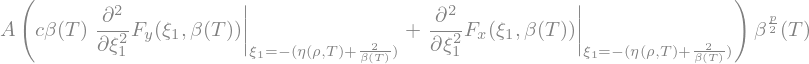

In [59]:
d2wdeta2 = diff(w_full, eta, eta)
d2wdeta2

$\partial^2 w/\partial \beta^2$

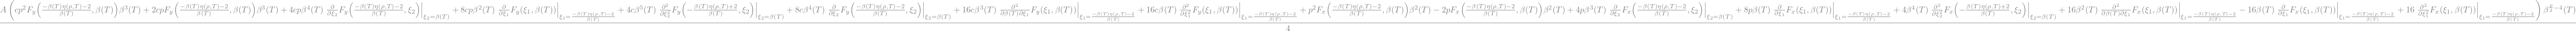

In [60]:
d2wdbeta2 = diff(w_full, beta, beta)
simplify(d2wdbeta2)

$\partial^2 w / \partial \eta \partial \beta$

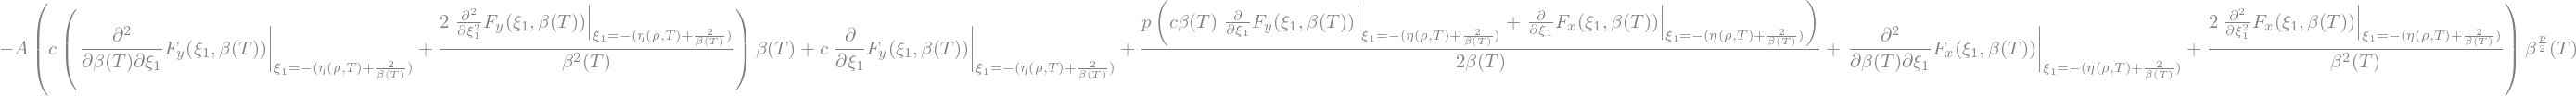

In [61]:
d2wdetadbeta = diff(w_full, eta, beta)
d2wdetadbeta

$\partial^3 w /\partial \eta^3$

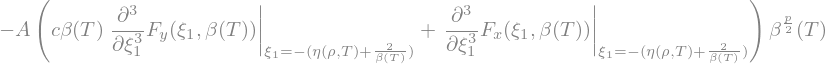

In [62]:
d3wdeta3 = diff(w_full, eta, eta, eta)
d3wdeta3

$\partial^3 w /\partial \eta^2\partial \beta$

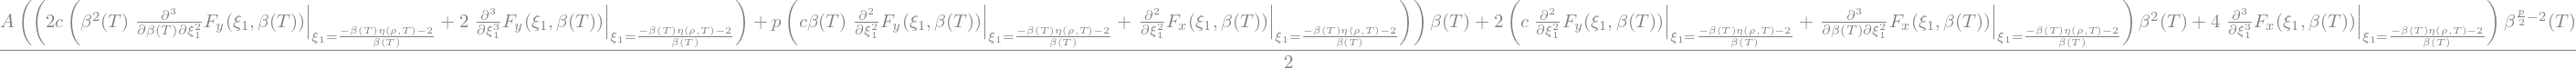

In [63]:
d3wdeta2dbeta = diff(w_full, eta, eta, beta)
simplify(d3wdeta2dbeta)

$\partial^3 w /\partial \eta \partial \beta^2$

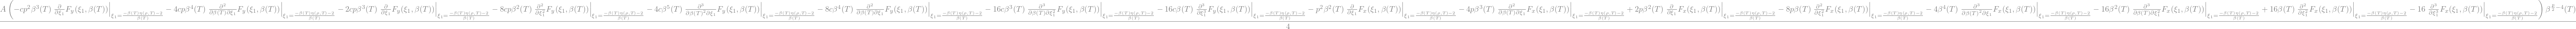

In [64]:
d3wdetadbeta2 = diff(w_full, eta, beta, beta)
simplify(d3wdetadbeta2)

$\partial^3 w /\partial \beta^3$

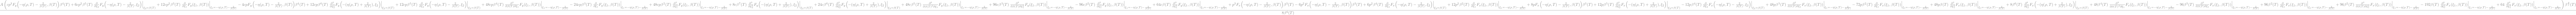

In [65]:
d3wdbeta2 = diff(w_full, beta, beta)
x = simplify(d3wdbeta2)
simplify(diff(x, beta))

## Entropy

The general expression for specific entropy is

$$s_e = \frac{1}{T} \left (e_e + \frac{p_e}{\rho} \right ) - \frac{n_e k \eta}{\rho}$$ 

or using specific enthalpy, $h = e + p /\rho$,

$$s_e = \frac{h}{T}  - \frac{n_e k \eta}{\rho}$$ 

and for positrons, it is:

$$s_p = \frac{1}{T} \left (e_p + \frac{p_p}{\rho} \right ) + \frac{n_p k \eta}{\rho}$$ 

where we used $\eta_p = -\eta$ for positrons.

In [66]:
e = Function("e")(rho, T)
p = Function("p")(rho, T)
n_e = Function("n_e")(rho, T)
k = symbols("k", constant=True)
h = Function("h")(rho, T)

First create the entropy (for electrons)

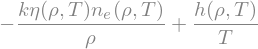

In [67]:
s = h / T - n_e * k * eta / rho
s

### First derivatives

$\partial s_e / \partial \rho$

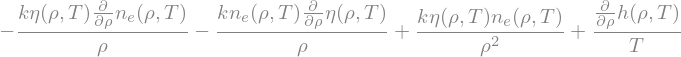

In [73]:
dsdrho = diff(s, rho)
simplify(dsdrho)

$\partial s_e / \partial T$

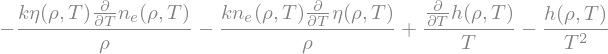

In [74]:
dsdT = diff(s, T)
simplify(dsdT)

### Second derivatives

$\partial^2 s_e / \partial \rho^2$

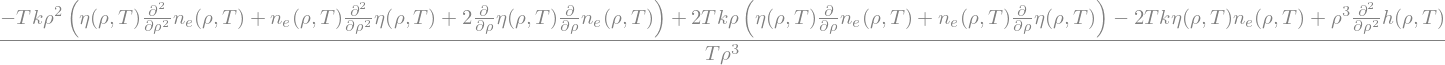

In [75]:
d2sdrho2 = diff(s, rho, rho)
simplify(d2sdrho2)

$\partial^2 s_e / \partial T^2$

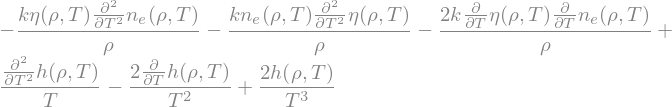

In [76]:
d2sdT2 = diff(s, T, T)
simplify(d2sdT2)

$\partial^2 s_e / \partial \rho \partial T$

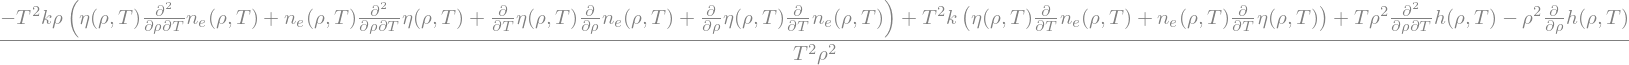

In [72]:
d2sdrhodT = diff(s, rho, T)
simplify(d2sdrhodT)

### Third derivatives

$\partial^3 s_e / \partial \rho^3$

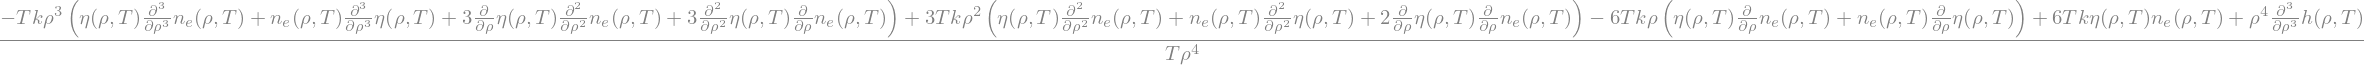

In [77]:
d3sdrho3 = diff(s, rho, rho, rho)
simplify(d3sdrho3)

$\partial^3 s_e / \partial \rho^2 \partial T$

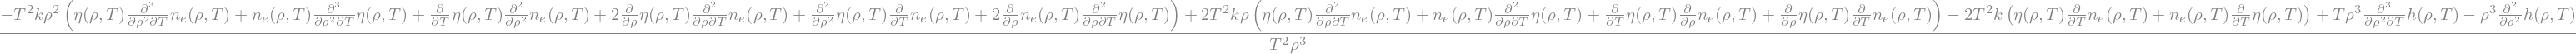

In [78]:
d3sdrho2dT = diff(s, rho, rho, T)
simplify(d3sdrho2dT)

$\partial^3 s_e / \partial \rho \partial T^2$

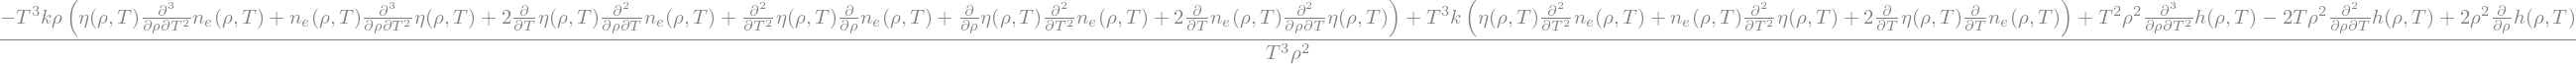

In [79]:
d3sdrhodT2 = diff(s, rho, T, T)
simplify(d3sdrhodT2)

$\partial^3 s_e / \partial T^3$

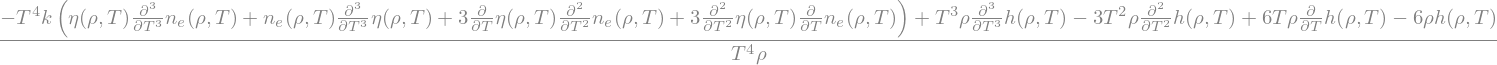

In [80]:
d3sdT3 = diff(s, T, T, T)
simplify(d3sdT3)

```{note}
The positron terms are the same form, just with $\eta \rightarrow -\eta$
```

### Enthalpy derivatives

In [83]:
h = e + p / rho

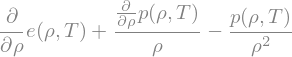

In [84]:
diff(h, rho)

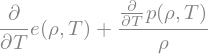

In [85]:
diff(h, T)

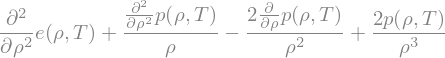

In [86]:
diff(h, rho, rho)

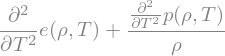

In [87]:
diff(h, T, T)

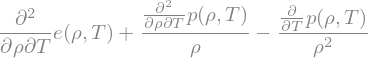

In [88]:
diff(h, rho, T)

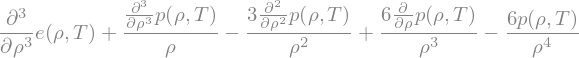

In [89]:
diff(h, rho, rho, rho)

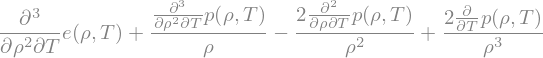

In [90]:
diff(h, rho, rho, T)

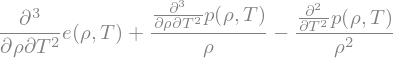

In [91]:
diff(h, rho, T, T)

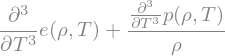

In [92]:
diff(h, T, T, T)

## Helmholtz free energy

We define the Helmholtz free energy as:

$$F = e - T s$$

For the interpolation scheme in Timmes & Swesty (2000), we need the following partial derivatives:
$\partial F/\partial T$, $\partial F/\partial \rho$, $\partial^2 F/\partial T^2$, $\partial^2 F/\partial \rho^2$, $\partial^2 F/\partial \rho\partial T$, $\partial^3 F / \partial \rho \partial T^2$, $\partial^3 F /\partial \rho^2 \partial T$, and $\partial^4 F/\partial T^2\partial \rho^2$

In [104]:
s = Function("s")(rho, T)

In [105]:
F = e - T * s
F

$\partial F/\partial T$

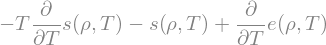

In [106]:
dFdT = diff(F, T)
dFdT

In [107]:
E = Function("E")(rho, T)
e = E / rho

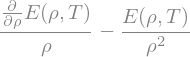

In [108]:
e.diff(rho)

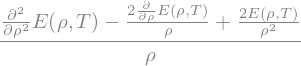

In [109]:
e.diff(rho, rho)

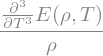

In [113]:
e.diff(T, T, T)